# Multiple Linear Regression :

***Problem statement :***
- Prepare a prediction model for profit of 50_startups data.
- Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.


In [1]:
# Importing usefull libraries

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
import math
import statsmodels.api as sm
import statsmodels.stats.tests.test_influence
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ignore anoying warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
df = pd.read_csv('50_Startups.csv')

# showing first 5 rows only
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
# Dimensions of datset

df.shape

(50, 5)

In [4]:
# Looking for null values 

df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
# Information about the given data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [3]:
# Basic stats 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


***Pairplot :***

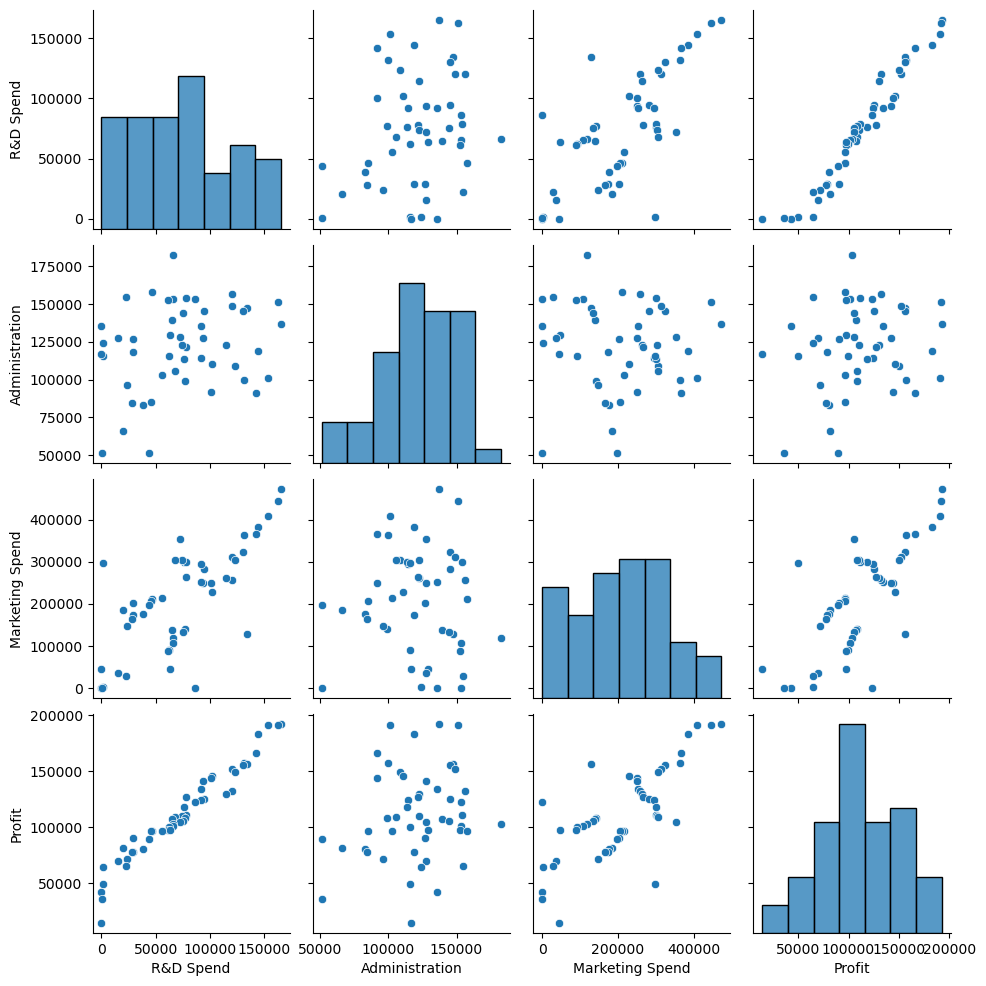

In [6]:
sns.pairplot(df)

***Scatter Matrix :***

In [7]:
plt.rcParams['figure.figsize']=[10,5]
plt.rcParams['figure.dpi']=300

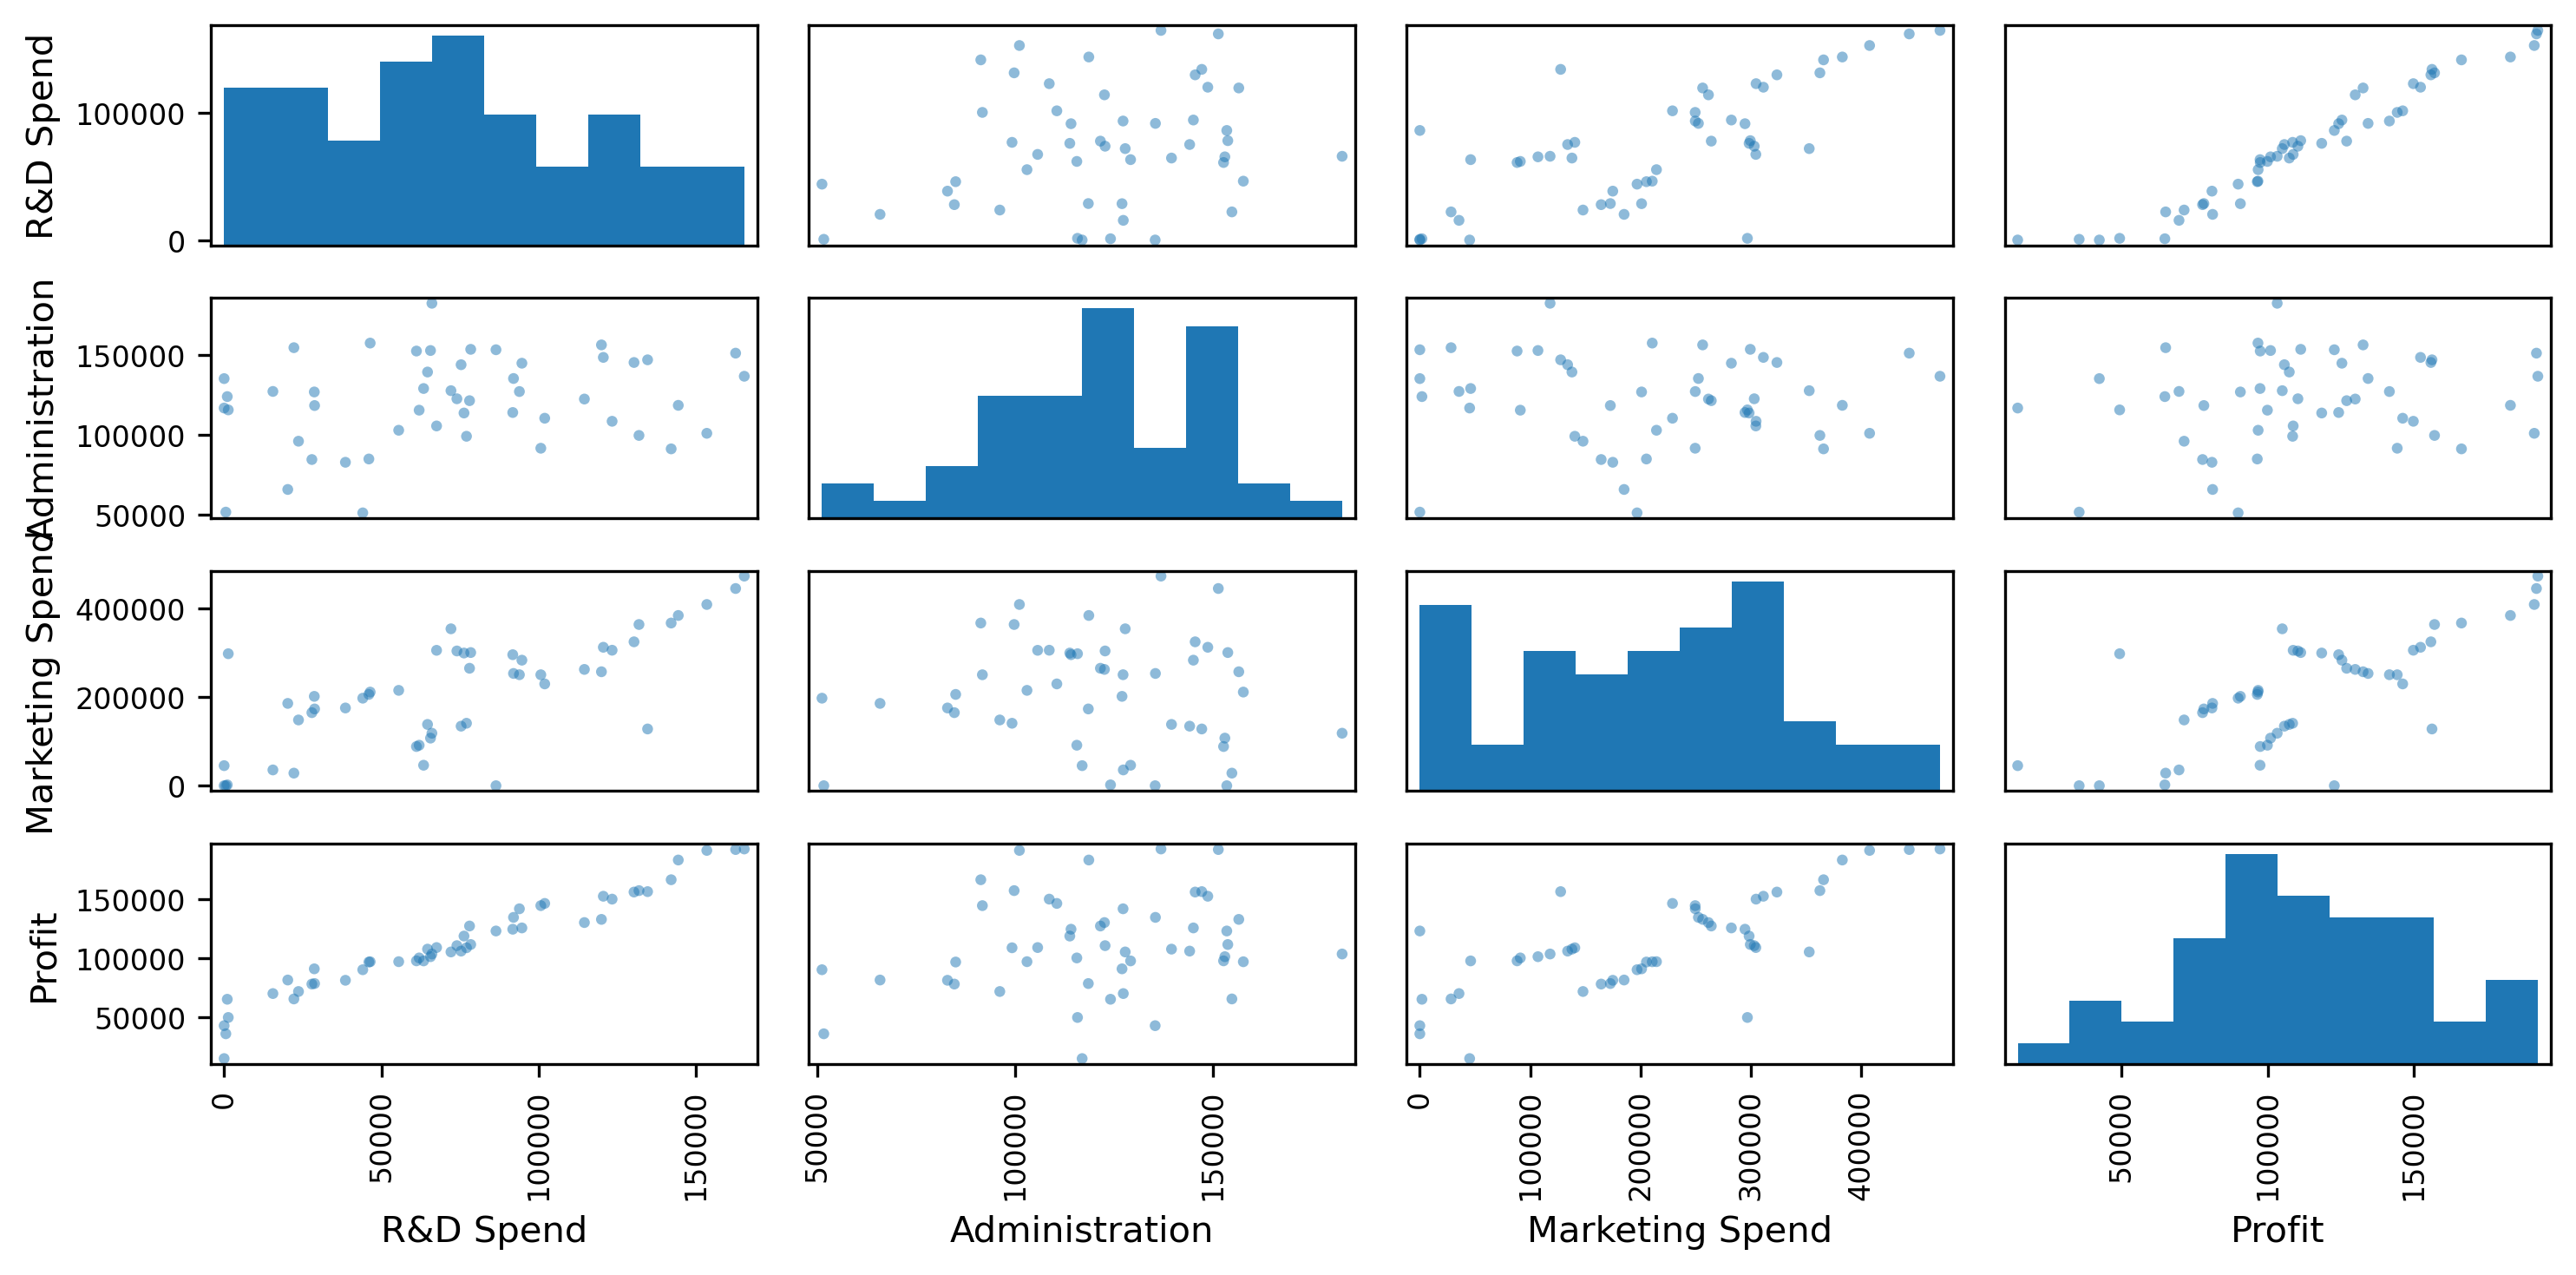

In [8]:
pd.plotting.scatter_matrix(df)
plt.tight_layout()

# Correlation :

In [6]:
# Correlation between numerical columns

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.0000,0.2420,0.7242,0.9729
Administration,0.2420,1.0000,-0.0322,0.2007
Marketing Spend,0.7242,-0.0322,1.0000,0.7478
Profit,0.9729,0.2007,0.7478,1.0000


<AxesSubplot: >

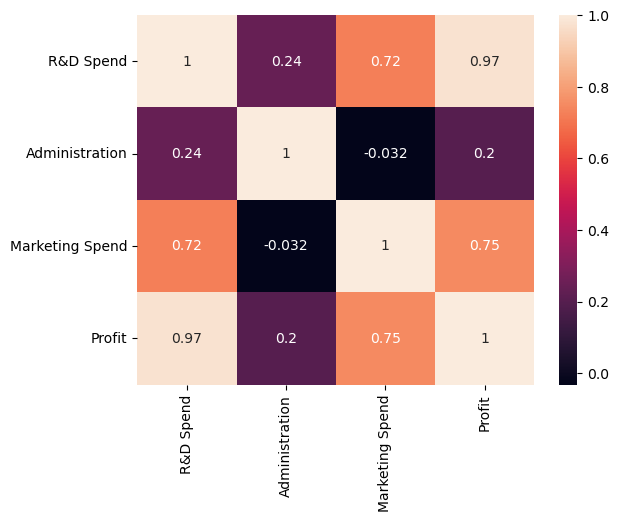

In [7]:
# Visualizing correlation by using heatmap

sns.heatmap(df.corr(),annot=True)

# Prepairing Model :

In [48]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [8]:
# Converting categorical variable into dummy/indicator variables.

df = pd.get_dummies(df, columns=['State'])

In [10]:
X = df[['R&D Spend','Administration', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]
Y = df[['Profit']]

In [11]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

In [12]:
# Coefficient
model.params

R&D Spend               0.806023
Administration         -0.027004
Marketing Spend         0.026980
State_California    50125.343832
State_Florida       50324.132625
State_New York      50083.456813
dtype: float64

In [16]:
# T-value
print('T-values :')
model.tvalues

T-values :


R&D Spend           17.368580
Administration      -0.517012
Marketing Spend      1.573889
State_California     7.280560
State_Florida        6.939569
State_New York       7.203572
dtype: float64

In [17]:
# P-values
print('P-values :')
model.pvalues

P-values :


R&D Spend           2.578772e-21
Administration      6.077373e-01
Marketing Spend     1.226769e-01
State_California    4.444178e-09
State_Florida       1.401844e-08
State_New York      5.757175e-09
dtype: float64

In [18]:
# R-squared & Adjusted R-squared values
print('R-squared value :',model.rsquared)
print('Adjusted R-squared value :',model.rsquared_adj)

R-squared value : 0.9507524843355148
Adjusted R-squared value : 0.945156175737278


In [19]:
# Model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           1.34e-27
Time:                        16:09:01   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State_Florida     5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
State_New York    5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***Solving multicollinearity :***

In [20]:
# Calculating cook's distance

# Calculate influence and outlier measures.
influence = model.get_influence()

summ_df = influence.summary_frame()

summ_df.sort_values('cooks_d', ascending=False)

,dfb_R&D Spend,dfb_Administration,dfb_Marketing Spend,dfb_State_California,dfb_State_Florida,dfb_State_New York,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
49,0.578956,-0.114232,0.080954,-0.566028,-0.246221,-0.231130,0.263959,-3.744509,0.101490,-1.258474,-4.484594,-1.507205
48,-0.112734,0.701599,0.418630,-0.783828,-0.801849,-0.951339,0.156376,-1.651796,0.255887,-0.968637,-1.686029,-0.988712
45,-0.212843,0.091394,-0.189969,0.095382,0.140857,0.295051,0.094395,1.966666,0.127729,0.752575,2.035721,0.779000
14,-0.221204,-0.257240,0.142195,0.267421,0.086725,0.275394,0.072017,-1.914478,0.105459,-0.657343,-1.976719,-0.678713
36,-0.379353,0.189523,0.218405,-0.107545,0.053174,-0.090698,0.059247,1.714446,0.107892,0.596224,1.754467,0.610141
38,-0.189819,-0.313449,0.109261,0.320201,0.309091,0.445171,0.055802,1.341034,0.156954,0.578628,1.353659,0.584076
15,-0.208289,0.066627,0.071114,-0.002577,0.007587,-0.143330,0.043416,-1.787748,0.075363,-0.510387,-1.835225,-0.523941
46,0.434369,-0.142646,-0.364064,0.106828,0.034265,0.093661,0.042323,-0.838336,0.265420,-0.503925,-0.835454,-0.502192
19,0.252210,0.039342,-0.342025,0.009492,0.035168,0.085832,0.032891,0.857080,0.211760,0.444236,0.854447,0.442872
27,0.271462,-0.146112,-0.339679,0.169919,0.186504,0.075224,0.032503,-1.063541,0.147057,-0.441609,-1.065166,-0.442284


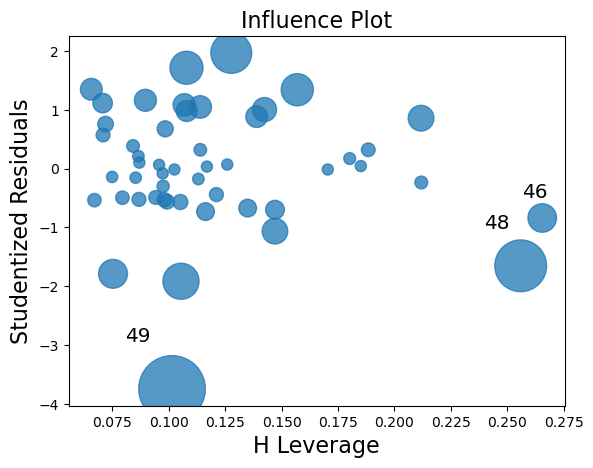

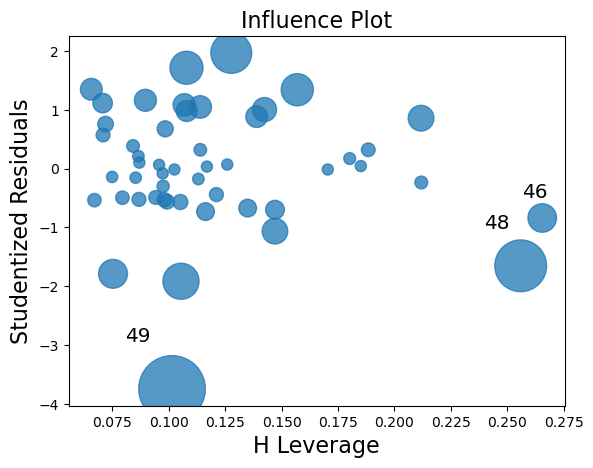

In [21]:
# Ploting influence in regression. Plots studentized resids vs. leverage.

influence.plot_influence()

# Variance Inflation Factor (VIF) :

In [22]:
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif["Features"] = X.columns

vif.round(1)

,VIF Factor,Features
0,2.5,R&D Spend
1,1.2,Administration
2,2.4,Marketing Spend
3,9.0,State_California
4,9.4,State_Florida
5,9.2,State_New York


- Administration has the lowest variance inflation factor We would need to discard this variables to improve model and try to solve multicolinearity.

In [23]:
# Removed "Administration" fron the data & Test the model

new_X = df[['R&D Spend', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]

In [24]:
new_model = sm.OLS(Y, new_X).fit()
new_predictions = new_model.predict(new_X)

new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           9.72e-29
Time:                        16:18:18   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7967      0.042     18.771      0.000       0.711       0.882
Marketing Spend      0.0298      0.016      1.842      0.072      -0.003       0.062
State_California  4.696e+04   3119.471     15.053      0.000    4.07e+04    5.32e+04
State_Florida      4.71e+04   3670.129     12.833      0.000    3.97e+04    5.45e+04
State_New York    4.694e+04   3342.591     14.043      0.000    4.02e+04    5.37e+04
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                     9.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Final Model :

In [26]:
# Removed Index with highest Cook's distance to remove the hightest influencial ROW

new_df = df.drop(df.index[[49,48]])

In [29]:
new_X = new_df[['R&D Spend', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]
new_Y = new_df[['Profit']]

final_model = sm.OLS(new_Y, new_X).fit()
predictions = final_model.predict(new_X)

final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     265.9
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           1.02e-29
Time:                        16:22:51   Log-Likelihood:                -494.30
No. Observations:                  48   AIC:                             998.6
Df Residuals:                      43   BIC:                             1008.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7692      0.035     22.072      0.000       0.699       0.840
Marketing Spend      0.0251      0.013      1.908      0.063      -0.001       0.052
State_California  5.183e+04   2710.866     19.120      0.000    4.64e+04    5.73e+04
State_Florida     5.046e+04   3078.590     16.391      0.000    4.43e+04    5.67e+04
State_New York     5.09e+04   2936.767     17.333      0.000     4.5e+04    5.68e+04
==============================================================================
Omnibus:                        0.133   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.304
Skew:                           0.097   Prob(JB):                        0.859
Kurtosis:                       2.661   Cond. No.                     1.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Square root transformation on X :

In [30]:
X_sqrt = np.sqrt(new_df[['R&D Spend', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']])

model3 = sm.OLS(new_Y, X_sqrt).fit()
predictions3 = model3.predict(X_sqrt)

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     84.44
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           8.67e-20
Time:                        16:24:24   Log-Likelihood:                -519.91
No. Observations:                  48   AIC:                             1050.
Df Residuals:                      43   BIC:                             1059.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend          340.5455     25.777     13.211      0.000     288.560     392.531
Marketing Spend     20.0497     15.481      1.295      0.202     -11.170      51.270
State_California  1.836e+04   6267.224      2.930      0.005    5724.219     3.1e+04
State_Florida     1.692e+04   7013.669      2.413      0.020    2779.320    3.11e+04
State_New York    1.908e+04   6591.247      2.894      0.006    5782.772    3.24e+04
==============================================================================
Omnibus:                        7.588   Durbin-Watson:                   0.777
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.161
Skew:                           0.941   Prob(JB):                       0.0279
Kurtosis:                       3.197   Cond. No.                     3.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Square root transformation on Y :

In [31]:
Y_sqrt = np.sqrt(new_df['Profit'])

model4 = sm.OLS(Y_sqrt, new_X).fit()
predictions4 = model4.predict(new_X)

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     223.3
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           3.68e-28
Time:                        16:25:32   Log-Likelihood:                -185.87
No. Observations:                  48   AIC:                             381.7
Df Residuals:                      43   BIC:                             391.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.0012   5.64e-05     20.622      0.000       0.001       0.001
Marketing Spend   2.473e-05   2.13e-05      1.159      0.253   -1.83e-05    6.78e-05
State_California   241.0032      4.390     54.894      0.000     232.149     249.857
State_Florida      240.7325      4.986     48.283      0.000     230.678     250.787
State_New York     240.9886      4.756     50.669      0.000     231.397     250.580
==============================================================================
Omnibus:                        4.530   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                3.371
Skew:                          -0.532   Prob(JB):                        0.185
Kurtosis:                       3.745   Cond. No.                     1.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Square root transformation on X & Y :

In [32]:
model5 = sm.OLS(Y_sqrt, X_sqrt).fit()
predictions5 = model5.predict(X_sqrt)

model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     141.7
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           3.64e-24
Time:                        16:26:53   Log-Likelihood:                -196.16
No. Observations:                  48   AIC:                             402.3
Df Residuals:                      43   BIC:                             411.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.5271      0.030     17.371      0.000       0.466       0.588
Marketing Spend      0.0231      0.018      1.270      0.211      -0.014       0.060
State_California   187.8689      7.377     25.465      0.000     172.991     202.747
State_Florida      187.0162      8.256     22.652      0.000     170.366     203.666
State_New York     189.8076      7.759     24.463      0.000     174.160     205.455
==============================================================================
Omnibus:                        7.976   Durbin-Watson:                   1.243
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.007
Skew:                           0.870   Prob(JB):                       0.0301
Kurtosis:                       3.692   Cond. No.                     3.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***Conclusion :***
- We will use Model 5.3 as it has the best R square value 1 - p-value < 0.01 Thus the model is accepted.
- Coefficient = 1 Thus if the value of x increased by 1, the predicted value of Price will increase by 1
- Adj. R-sqared = 1 Thus the model explains 100% of the variance in dependent variable.